In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

In [23]:
city = ({"City":['lebu', 'yellowknife', 'mataura', 'busselton', 'lavrentiya', 'ust-tsilma', 'udachnyy', 'mahebourg', 'hilo', 'castro', 'pevek', 'punta arenas', 'quatre cocos', 'albany', 'ilabaya', 'honiara', 'arraial do cabo', 'bull savanna','tapes', 'ketchikan', 'flinders', 'ulagan', 'vostok', 'rikitea', 'east london', 'port alfred', 'illoqqortoormiut', 'bengkulu', 'lorengau', 'attawapiskat', 'aflu', 'longyearbyen','nizhneyansk', 'puerto baquerizo moreno', 'alice springs','bluff', 'qaanaaq', 'atambua', 'vanavara', 'tateyama', 'hobart', 'saskylakh','cape town', 'ancud', 'meulaboh', 'nikolskoye', 'tiksi', 'bolshevik', 'ruatoria', 'atuona', 'cabo san lucas', 'wenling', 'college', 'srednekolymsk', 'tuktoyaktuk', 'mys shmidta', 'mabai', 'namibe', 'ponta do sol', 'ahipara', 'isangel', 'mount isa', 'ostrovnoy', 'belushya guba', 'barrow', 'butaritari', 'carnarvon', 'morogoro', 'tsihombe', 'killybegs', 'hermanus', 'havelock', 'chokurdakh', 'trelew', 'olenegorsk', 'port elizabeth', 'sungaipenuh', 'foz', 'chifeng', 'busembatia', 'tahta', 'ushuaia', 'naze', 'damghan', 'port hawkesbury', 'kodiak', 'verkhnyaya inta', 'klaksvik', 'faanui', 'beringovskiy', 'thompson', 'touros', 'shestakovo', 'bonthe', 'san jose', 'vaitupu', 'zhuhai', 'constitucion', 'ribeira grande', 'nishihara', 'salinopolis', 'fortuna', 'kaitangata', 'port hardy', 'deputatskiy', 'podbelsk', 'maniitsoq', 'itarema', 'kapaa', 'cascais', 'yuzhno-kurilsk', 'saint george', 'palabuhanratu', 'quilmana', 'wawa', 'gao', 'byron bay', 'saint-nazaire', 'carrboro', 'dikson', 'bara', 'kiruna', 'waipawa', 'guerrero negro', 'taolanaro', 'geraldton', 'puerto ayora', 'saint-francois', 'nanortalik', 'krasnoselkup', 'amderma', 'arlit', 'pereira barreto', 'samusu', 'norman wells', 'balkhash', 'juba', 'tasiilaq', 'cubuk', 'brae', 'puerto ayacucho', 'codrington', 'yinchuan', 'berlesti', 'ganzhou', 'torbay', 'gat', 'kavieng', 'iqaluit', 'carutapera', 'eirunepe', 'saleaula', 'sangar', 'camacha', 'mar del plata', 'myitkyina', 'barentsburg', 'olafsvik', 'necochea', 'cidreira', 'hambantota', 'balakhninskiy', 'galle', 'concepcion del oro', 'paamiut', 'kysyl-syr', 'zverinogolovskoye', 'paita', 'neiafu', 'safaga', 'kirakira', 'olinda', 'shingu', 'jamestown', 'maragogi', 'mahibadhoo', 'san patricio', 'key west', 'sitka', 'morant bay', 'dingle', 'saint-augustin', 'fare', 'tigil', 'batemans bay', 'sentyabrskiy', 'rincon', 'balozi', 'anshun', 'vardo', 'kaseda', 'acapulco', 'rawson', 'viedma', 'yining', 'bourail', 'nieuw amsterdam', 'vao', 'avarua', 'upernavik', 'victoria', 'coahuayana', 'alangayam', 'conceicao da barra', 'bilibino', 'cherskiy', 'renqiu', 'sorvag', 'bredasdorp', 'adrar', 'mogadishu', 'vaini', 'kruisfontein', 'whitianga', 'hithadhoo', 'blagoyevo', 'pathein', 'mangrol', 'chuy', 'kampong cham', 'new norfolk', 'coxim', 'oromocto', 'nerang', 'aranos', 'tromso', 'andenes', 'elko', 'milkovo', 'rimbey', 'omsukchan', 'balikpapan', 'severo-kurilsk', 'bandarbeyla', 'biloela', 'tual', 'borogontsy', 'port macquarie', 'goba', 'maracaibo', 'shirvan', 'shiyan', 'waingapu', 'grand river south east', 'pangnirtung', 'hailar', 'sao filipe', 'punto fijo', 'nicolas bravo', 'vernon', 'nagato', 'pringsewu', 'fort nelson', 'romny', 'tonshayevo', 'avrille', 'jasper', 'semey', 'vila velha', 'sandpoint', 'linxia', 'narsaq', 'mandalgovi', 'yar-sale', 'anadyr', 'lompoc', 'maroantsetra', 'shimoda', 'sabaudia', 'vanimo', 'tecoanapa', 'cozumel', 'saint-philippe', 'jablah', 'cuamba', 'cap-chat', 'khatanga', 'puerto cabezas', 'provideniya', 'kudahuvadhoo', 'grindavik', 'ambodifototra', 'zlotow', 'bubaque', 'asfi', 'potgietersrus', 'denpasar', 'ugoofaaru', 'tiznit', 'abu dhabi', 'ekhabi', 'alvdal', 'bahile', 'huilong', 'honningsvag', 'davila', 'kijang', 'maceio', 'mossendjo', 'puerto escondido', 'lufilufi', 'belyy yar', 'lagoa', 'shahr-e babak', 'bethel', 'thap than', 'malanville', 'atherton', 'port lincoln', 'tumannyy', 'clyde river', 'petropavlovsk-kamchatskiy', 'airai', 'ribas do rio pardo', 'saiha', 'kalmunai', 'burnie', 'pirot', 'taranagar', 'maltahohe', 'luderitz', 'nola', 'tacna', 'hohhot', 'stepnogorsk', 'markova', 'bojaya', 'moscow', 'mrirt', 'jiddah', 'padang', 'san clemente', 'kahului', 'lieksa', 'hasaki', 'sao felix do xingu', 'ruhengeri', 'ryotsu', 'kavaratti', 'mount gambier', 'saint-leu', 'cap malheureux', 'tsuruoka', 'sola', 'rio gallegos', 'shieli', 'louisbourg', 'trincomalee', 'ngukurr', 'jumla', 'henties bay', 'sakakah', 'palmer', 'ilulissat', 'arman', 'salalah', 'saint anthony', 'kastamonu', 'sirohi', 'aden', 'abnub', 'nouakchott', 'bartica', 'noumea', 'nybro', 'taoudenni', 'guatire', 'usoke', 'kamenskoye', 'port blair', 'ballina', 'samarai', 'grootfontein', 'san quintin', 'dunedin', 'chauk', 'awjilah', 'matsanga', 'coihaique', 'warqla', 'kendari', 'atocha', 'urengoy', 'altay', 'humaita', 'sept-iles', 'vestmannaeyjar', 'san', 'fuerte olimpo', 'westport', 'leningradskiy', 'kichmengskiy gorodok', 'kharp', 'mookane', 'la ligua', 'armidale', 'orlik', 'mumford', 'mount pleasant', 'kenai', 'bathsheba', 'alofi', 'victor harbor', 'baie-saint-paul', 'banda aceh', 'hofn', 'sao joao da barra', 'asau', 'general roca', 'moron', 'jardim', 'acarau', 'tubruq', 'west plains', 'north augusta', 'bratsk', 'manzhouli', 'hokitika', 'caravelas', 'ishigaki', 'katsuura', 'georgetown', 'yeppoon', 'maumere', 'camana', 'oistins', 'arauco', 'kayerkan', 'verwoerdburg', 'ljungby', 'hwange', 'mana', 'srandakan', 'imaichi', 'guacimo', 'matagami', 'gwanda', 'tazovskiy', 'normandin', 'kuala lipis', 'iberia', 'lichinga', 'gizo', 'falam', 'yerbogachen', 'shebunino', 'moerai', 'kaoma', 'ewo', 'lakes entrance', 'te anau', 'manono', 'banjar', 'winnemucca', 'ghanzi', 'cockburn town', 'poum', 'preobrazheniye', 'marsa matruh', 'sorong', 'khandyga', 'souillac', 'bahia blanca', 'san-pedro', 'umzimvubu', 'ternate', 'kang', 'luganville', 'kropotkin', 'lerwick', 'kiama', 'zaraza', 'green valley', 'atbasar', 'harper', 'husavik', 'gold coast', 'doume', 'itoman', 'la ronge', 'rawannawi', 'alta floresta', 'balgazyn', 'bronnoysund', 'marsh harbour', 'north platte', 'flin flon', 'coquimbo', 'muros', 'isla vista', 'saldanha', 'pouembout', 'mersing', 'filingue', 'egvekinot', 'megion', 'kawana waters', 'san luis', 'sisimiut', 'sarkand', 'tuatapere', 'mendi', 'jutai', 'zhongshu', 'magadan', 'esperance', 'tinogboc', 'kozmodemyansk', 'bereda', 'northam', 'garoua', 'san cristobal', 'zheleznogorsk-ilimskiy', 'pochutla', 'praia da vitoria', 'kyren', 'komsomolskiy', 'dire', 'acatic', 'lubbock', 'sembakung', 'abeche', 'matara', 'san pablo', 'derzhavinsk', 'nguiu', 'barreiras', 'sagua la grande', 'talnakh', 'fevralsk', 'eucaliptus', 'bambous virieux', 'dalvik', 'alyangula', 'koumac', 'dawson', 'dicabisagan', 'zhigansk', 'gigmoto', 'aksu', 'san martin', 'wasilla', 'avera', 'ayan', 'rock springs', 'marienburg', 'aloleng', 'renfrew', 'awbari', 'talawdi', 'sangre grande', 'plyussa', 'palora', 'cowra', 'pierre', 'cayhagan', 'ulladulla', 'broome', 'margate', 'lolua', 'iquitos', 'korla', 'duku', 'sieghartskirchen', 'slave lake', 'labutta', 'tasbuget', 'redlands', 'braesti', 'kaeo', 'turinsk', 'belaya gora', 'bukene', 'general jose eduvigis diaz', 'aswan', 'tabon', 'gamba', 'belmonte', 'tawnat', 'hargeysa', 'wajima', 'nurota', 'okha', 'auki', 'bira', 'tunduru', 'kodinsk', 'itaituba', 'druzhba', 'hualmay', 'sulangan', 'ciucurova', 'san pedro', 'luanda', 'sechura', 'sao domingos', 'oksfjord', 'kerteh', 'kupang', 'fairbanks', 'kutum', 'pisco', 'morros', 'hoi an', 'bokoro', 'nova soure', 'mahon', 'kushima', 'dukat', 'maues', 'kumbo', 'haapiti', 'bolungarvik', 'hamilton', 'suntar', 'tanout']})
city_df = pd.DataFrame(city)
city_df.head()

,City
0,lebu
1,yellowknife
2,mataura
3,busselton
4,lavrentiya


In [34]:
#Create Dataframe to hold API call information 
city_df['Country'] = ""
city_df['Max Temperature(F)'] =0
city_df['Latitude'] = 0
city_df['Longitude']=0
city_df['Humidity(%)']=0
city_df['Cloudiness(%)']=0
city_df['Windspeed(mph)']=0
city_df.head()

,City,Country,Max Temperature(F),Latitude,Longitude,Humidity(%),Cloudiness(%),Windspeed(mph)
0,Lebu,,0,0,0,0,0,0
1,Yellowknife,,0,0,0,0,0,0
2,Mataura,,0,0,0,0,0,0
3,Busselton,,0,0,0,0,0,0
4,Lavrentiya,,0,0,0,0,0,0


In [38]:
#url for API calls
url ="https://api.openweathermap.org/data/2.5/weather?"
params = {"units":"imperial","appid": api_key}
row_count = 0

# use iterrows to iterate through pandas dataframe
for index, row in city_df.iterrows():
    # get city name from df
    city_name = row['City']
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + city_name.replace(" ","+")
    
    #assemble API request 
    response = requests.get(target_url, params=params).json()
    #results = 
    time.sleep(.5)
    
    try:
        print(f"Starting Data Retrieval for {index}:{city_name}.")
        city_df.loc[index, 'City']= [response][0]["name"]
        city_df.loc[index, 'Country'] =[response][0]["sys"]["country"]
        city_df.loc[index, 'Max Temperature(F)']= [response][0]["main"]["temp_max"]
        city_df.loc[index, 'Latitude']= [response][0]["coord"]["lat"]
        city_df.loc[index, 'Longitude']= [response][0]["coord"]["lon"]
        city_df.loc[index, 'Humidity(%)']= [response][0]["main"]["humidity"]
        city_df.loc[index, 'Cloudiness(%)']= [response][0]["clouds"]["all"]
        city_df.loc[index, 'Windspeed(mph)']= [response][0]["wind"]["speed"]
    
    except:
        print("City information not found. Skipping...")
        
    print("------------")

Starting Data Retrieval for 0:Lebu.
------------
Starting Data Retrieval for 1:Yellowknife.
------------
Starting Data Retrieval for 2:Mataura.
------------
Starting Data Retrieval for 3:Busselton.
------------
Starting Data Retrieval for 4:Lavrentiya.
------------
Starting Data Retrieval for 5:Ust-Tsilma.
------------
Starting Data Retrieval for 6:Udachnyy.
------------
Starting Data Retrieval for 7:Mahebourg.
------------
Starting Data Retrieval for 8:Hilo.
------------
Starting Data Retrieval for 9:Castro.
------------
Starting Data Retrieval for 10:Pevek.
------------
Starting Data Retrieval for 11:Punta Arenas.
------------
Starting Data Retrieval for 12:Quatre Cocos.
------------
Starting Data Retrieval for 13:Albany.
------------
Starting Data Retrieval for 14:Ilabaya.
------------
Starting Data Retrieval for 15:Honiara.
------------
Starting Data Retrieval for 16:Arraial do Cabo.
------------
Starting Data Retrieval for 17:Bull Savanna.
------------
Starting Data Retrieval for 

Starting Data Retrieval for 137:tasiilaq.
------------
Starting Data Retrieval for 138:cubuk.
------------
Starting Data Retrieval for 139:brae.
------------
Starting Data Retrieval for 140:puerto ayacucho.
------------
Starting Data Retrieval for 141:codrington.
------------
Starting Data Retrieval for 142:yinchuan.
------------
Starting Data Retrieval for 143:berlesti.
------------
Starting Data Retrieval for 144:ganzhou.
------------
Starting Data Retrieval for 145:torbay.
------------
Starting Data Retrieval for 146:gat.
------------
Starting Data Retrieval for 147:kavieng.
------------
Starting Data Retrieval for 148:iqaluit.
------------
Starting Data Retrieval for 149:carutapera.
------------
Starting Data Retrieval for 150:eirunepe.
------------
Starting Data Retrieval for 151:saleaula.
City information not found. Skipping...
------------
Starting Data Retrieval for 152:sangar.
------------
Starting Data Retrieval for 153:camacha.
------------
Starting Data Retrieval for 154:ma

Starting Data Retrieval for 279:kudahuvadhoo.
------------
Starting Data Retrieval for 280:grindavik.
------------
Starting Data Retrieval for 281:ambodifototra.
City information not found. Skipping...
------------
Starting Data Retrieval for 282:zlotow.
------------
Starting Data Retrieval for 283:bubaque.
------------
Starting Data Retrieval for 284:asfi.
City information not found. Skipping...
------------
Starting Data Retrieval for 285:potgietersrus.
City information not found. Skipping...
------------
Starting Data Retrieval for 286:denpasar.
------------
Starting Data Retrieval for 287:ugoofaaru.
------------
Starting Data Retrieval for 288:tiznit.
------------
Starting Data Retrieval for 289:abu dhabi.
------------
Starting Data Retrieval for 290:ekhabi.
------------
Starting Data Retrieval for 291:alvdal.
------------
Starting Data Retrieval for 292:bahile.
------------
Starting Data Retrieval for 293:huilong.
------------
Starting Data Retrieval for 294:honningsvag.
---------

Starting Data Retrieval for 415:bratsk.
------------
Starting Data Retrieval for 416:manzhouli.
------------
Starting Data Retrieval for 417:hokitika.
------------
Starting Data Retrieval for 418:caravelas.
------------
Starting Data Retrieval for 419:ishigaki.
------------
Starting Data Retrieval for 420:katsuura.
------------
Starting Data Retrieval for 421:georgetown.
------------
Starting Data Retrieval for 422:yeppoon.
------------
Starting Data Retrieval for 423:maumere.
------------
Starting Data Retrieval for 424:camana.
City information not found. Skipping...
------------
Starting Data Retrieval for 425:oistins.
------------
Starting Data Retrieval for 426:arauco.
------------
Starting Data Retrieval for 427:kayerkan.
------------
Starting Data Retrieval for 428:verwoerdburg.
City information not found. Skipping...
------------
Starting Data Retrieval for 429:ljungby.
------------
Starting Data Retrieval for 430:hwange.
------------
Starting Data Retrieval for 431:mana.
------

Starting Data Retrieval for 558:margate.
------------
Starting Data Retrieval for 559:lolua.
City information not found. Skipping...
------------
Starting Data Retrieval for 560:iquitos.
------------
Starting Data Retrieval for 561:korla.
City information not found. Skipping...
------------
Starting Data Retrieval for 562:duku.
------------
Starting Data Retrieval for 563:sieghartskirchen.
------------
Starting Data Retrieval for 564:slave lake.
------------
Starting Data Retrieval for 565:labutta.
City information not found. Skipping...
------------
Starting Data Retrieval for 566:tasbuget.
City information not found. Skipping...
------------
Starting Data Retrieval for 567:redlands.
------------
Starting Data Retrieval for 568:braesti.
------------
Starting Data Retrieval for 569:kaeo.
------------
Starting Data Retrieval for 570:turinsk.
------------
Starting Data Retrieval for 571:belaya gora.
------------
Starting Data Retrieval for 572:bukene.
------------
Starting Data Retrieval

In [39]:
city_df.head(25)

,City,Country,Max Temperature(F),Latitude,Longitude,Humidity(%),Cloudiness(%),Windspeed(mph)
0,Lebu,ET,59.00,8.96,38.73,72,75,6.93
1,Yellowknife,CA,41.00,62.45,-114.38,65,75,10.29
2,Mataura,NZ,64.99,-46.19,168.86,59,1,5.01
3,Busselton,AU,51.01,-33.64,115.35,96,100,32.35
4,Lavrentiya,RU,5.13,65.58,-170.99,79,0,9.89
5,Ust-Tsilma,RU,34.11,65.44,52.15,91,97,8.79
6,Udachnyy,RU,21.20,66.42,112.40,41,0,11.18
7,Mahebourg,MU,77.00,-20.41,57.70,83,40,9.17
8,Hilo,US,80.60,19.71,-155.08,61,75,9.17
9,Castro,CL,48.20,-42.48,-73.76,93,20,5.82


In [68]:
city_df.to_csv("city_weather_data.csv", encoding="utf-8",index=False)

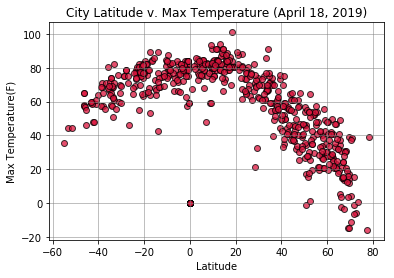

In [62]:
plt.scatter(city_df["Latitude"],city_df["Max Temperature(F)"], marker="o", edgecolors="black", facecolors="crimson",alpha=.75)
plt.title("City Latitude v. Max Temperature (April 18, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(color='grey', linestyle='-', linewidth=.5)

In [63]:
plt.savefig('City Latitude v. Max Temperature (April 18, 2019).png')

<Figure size 432x288 with 0 Axes>

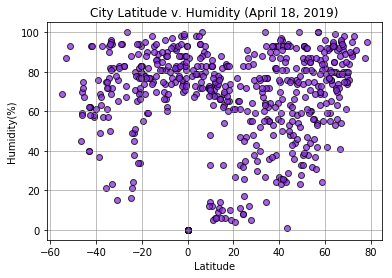

In [54]:
plt.scatter(city_df["Latitude"],city_df["Humidity(%)"], marker="o", edgecolors="black",facecolors="blueviolet",alpha =.75)
plt.title("City Latitude v. Humidity (April 18, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(color='grey', linestyle='-', linewidth=.5)

In [64]:
plt.savefig('City Latitude v. Humidity (April 18, 2019).png')

<Figure size 432x288 with 0 Axes>

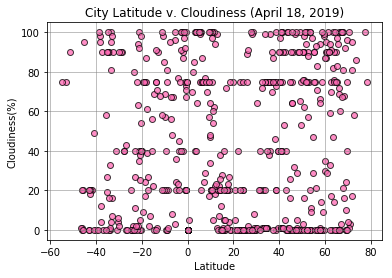

In [60]:
plt.scatter(city_df["Latitude"],city_df["Cloudiness(%)"], marker="o",edgecolors="black",facecolors="hotpink", alpha=.75)
plt.title("City Latitude v. Cloudiness (April 18, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(color='grey', linestyle='-', linewidth=.5)

In [65]:
plt.savefig('City Latitude v. Cloudiness (April 18, 2019).png')

<Figure size 432x288 with 0 Axes>

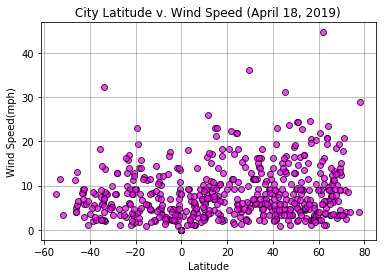

In [61]:
plt.scatter(city_df["Latitude"],city_df["Windspeed(mph)"], marker="o", edgecolors="black",facecolors="magenta",alpha=.75)
plt.title("City Latitude v. Wind Speed (April 18, 2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.grid(color='grey', linestyle='-', linewidth=.5)

In [66]:
plt.savefig('City Latitude v. Wind Speed (April 18, 2019).png')

<Figure size 432x288 with 0 Axes>